# FCBF : Fast Correlation Based Filter for Feature Selection

In [1]:
library("FCBF")
library('mlbench')
library('caret')
set.seed(64)

Loading required package: lattice

Loading required package: ggplot2



## Read pre-processed input data

In [2]:
mod_inp_mat <- readRDS("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/liu_mod_inp_mat_AntiPD1.rds")

In [3]:
# dividing data into discrete expression and response
expr <- mod_inp_mat[,-which(colnames(mod_inp_mat) %in%
                                        c("Patient", "OS", "OS.Event", "RECIST", "Age", "Gender", "Response","Source"))]
expr <- t(expr)
discrete_expression <- as.data.frame(discretize_exprs(expr))
res <- as.factor(mod_inp_mat$Response)

## SU Plot

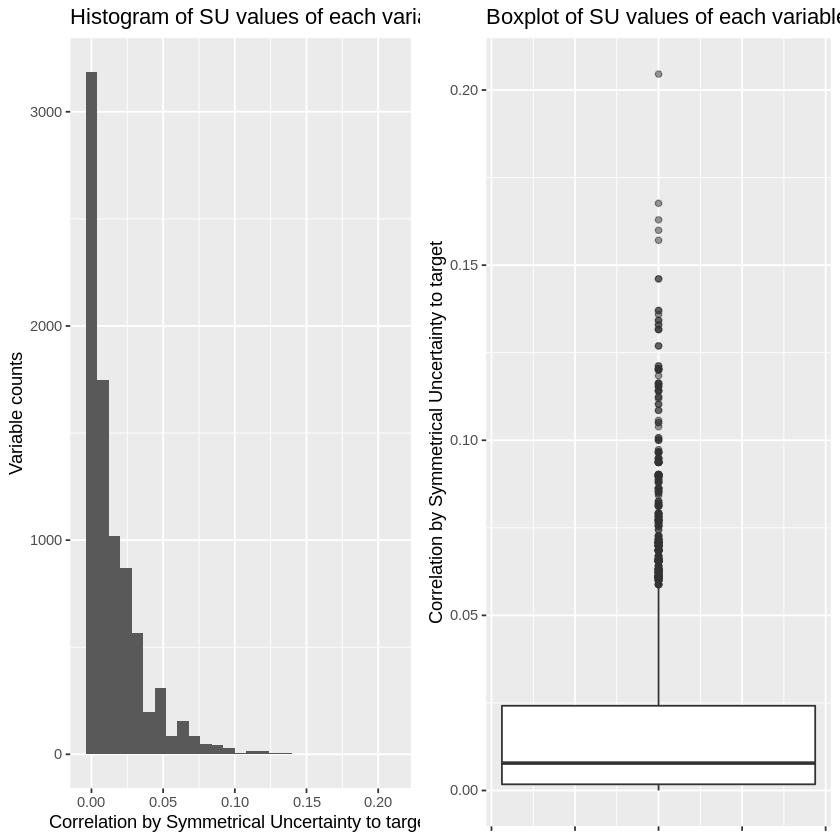

In [4]:
su_plot(discrete_expression,res)

## FCBF Analysis

Change cutoff???

In [6]:
fcbf_features <- fcbf(
                      discrete_expression,
                      res,
                      n_genes_selected_in_first_step = 6541,
                      minimum_su = 0.00,
                      verbose = FALSE,
                      samples_in_rows = FALSE,
                      balance_classes = FALSE
                     )


[1] "Number of features features =  8398"
[1] "Number of prospective features =  6588"
[1] "Number of final features =  18"


In [7]:
fcbf_table <- expr[fcbf_features$index,]

high_variance_genes <- sort(apply(expr, 1, var, na.rm = TRUE), decreasing = TRUE)
variance_table <- expr[names(high_variance_genes)[1:200], ]

In [8]:
length(rownames(variance_table))
head(rownames(variance_table))  

[1] 200

[1] "6085"      "100126299" "6084"      "28883"     "26864"     "406993"

In [9]:
dataset_fcbf <- cbind(as.data.frame(t(fcbf_table)),Response = res)
dataset_100_var <- cbind(as.data.frame(t(variance_table)),Response = res)

In [10]:
# dataset_fcbf$Response <- as.character(dataset_fcbf$Response)
# dataset_fcbf$Response



# dataset_fcbf[dataset_fcbf$Response == '1',"Response"] <- 'Y' 
# dataset_fcbf[dataset_fcbf$Response == '0', "Response"] <- 'N' 
# dataset_fcbf$Response <- as.factor(dataset_fcbf$Response)
dim(dataset_fcbf)
head(dataset_fcbf)

[1] 60 19

,677767,148189,9360,64778,342538,55867,100996571,64232,101060691,100128733,54529,150967,729862,64582,342931,401447,29068,4322,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,12.562514,-9.965784,6.209974,7.884318,-1.625174,-9.965784,-9.965784,-9.9657843,-9.965784,-1.184602,5.147729,-9.965784,3.434749,-0.3032464,-4.432529,-0.3032464,6.281287,-3.1106013,Y
2,12.007040,-9.965784,6.686382,7.005579,-1.507996,-9.965784,-9.965784,-9.9657843,-9.965784,-2.401081,5.806282,-9.965784,-9.965784,-1.6234737,-9.965784,0.5729235,5.420009,-1.5079965,Y
3,10.832783,-9.965784,6.414987,6.851156,-9.965784,-9.965784,-9.965784,0.1893780,-4.395585,-3.810622,4.204328,-9.965784,2.112210,-1.8106220,-9.965784,-9.9657843,3.992433,-0.6951448,Y
4,9.832489,-9.965784,8.534349,6.758181,-9.965784,-9.965784,-9.965784,-9.9657843,-9.965784,-9.965784,3.654269,-9.965784,-9.965784,2.5628943,-9.965784,-9.9657843,4.998933,-9.9657843,Y
5,12.591880,-9.965784,4.914116,9.657411,4.707944,-9.965784,-9.965784,-9.9657843,-9.965784,-9.965784,4.932127,-9.965784,-9.965784,-9.9657843,-9.965784,-9.9657843,3.084846,-9.9657843,N
6,11.232063,-9.965784,5.816113,6.977165,-1.104984,-9.965784,-9.965784,-0.3500963,-9.965784,-9.965784,3.933935,-9.965784,-9.965784,-0.8570562,-9.965784,0.3868693,4.438048,-1.0175209,N


In [11]:
dim(dataset_100_var)
head(dataset_100_var)

[1]  60 201

,6085,100126299,6084,28883,26864,406993,100126339,26829,90737,768216,⋯,26494,147920,64478,392256,100132291,80039,117195,642424,28466,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.969417,12.787192,6.491912,4.006262,3.749865,-9.965784,5.103718,-9.965784,-9.9657843,3.122059,⋯,3.338960,-9.965784,3.691592,1.633560,-9.9657843,-9.9657843,3.843595,3.5702856,0.7172177,Y
2,4.140292,13.795458,6.330238,2.971473,-9.965784,-9.965784,-9.965784,-9.965784,-0.4010813,5.234507,⋯,-9.965784,-9.965784,-5.208436,-9.965784,1.1491158,-9.9657843,-9.965784,-9.9657843,-9.9657843,Y
3,-9.965784,-9.965784,10.204851,8.504339,-9.965784,-9.965784,-9.965784,4.797941,-2.0736564,-9.965784,⋯,-0.640697,-9.965784,-3.810622,1.593100,-9.9657843,-1.8106220,6.490112,0.6488096,-9.9657843,Y
4,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.9657843,-9.965784,⋯,-9.965784,-9.965784,-9.965784,-9.965784,-9.9657843,5.3029085,-9.965784,-9.9657843,-9.9657843,Y
5,11.337385,12.426861,7.960924,6.641626,-9.965784,-9.965784,-9.965784,-9.965784,-9.9657843,-9.965784,⋯,-9.965784,-9.965784,-2.137546,-9.965784,-0.9151541,-9.9657843,4.534879,-9.9657843,-9.9657843,N
6,-9.965784,-9.965784,-9.965784,7.400828,6.751831,6.080511,5.319183,-9.965784,-9.9657843,-9.965784,⋯,-9.965784,1.581517,-9.965784,1.464872,-9.9657843,0.2525682,-9.965784,2.8198287,-9.9657843,N


## Output Gene Lists

In [14]:
fcbf.list <- colnames(dataset_fcbf)[-which(colnames(dataset_fcbf) %in% c("Response"))]
top100var.list <- colnames(dataset_100_var)[-which(colnames(dataset_100_var) %in% c("Response"))]
saveRDS(fcbf.list, "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/liu_fcbf18.list.rds")
saveRDS(top100var.list, "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/liu_top200var.list.rds")